In [2]:
import pandas as pd
import numpy as np

from bokeh.plotting import figure,show
from bokeh.io import output_notebook
output_notebook()
from bokeh.models.annotations import Span
from bokeh.models.annotations import BoxAnnotation
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models import Range1d

from datetime import datetime as dt
from bokeh.io import export_png

Loading BokehJS ...

In [ ]:
df = pd.read_csv("../data/311_data_historical_filtered.csv")

In [6]:
groupby_type = df.groupby(["category"]).agg({"Case Reference":"count"}).reset_index()
groupby_type2 = groupby_type.sort_values(by = ["Case Reference"], ascending = False).reset_index(drop=True)
category_2 = ["Requests related to garbage/recycling collection","Requests related to snow removal","Requests related to roads and parking","Requests related to housing","Requests related to trees",
              "Other requests", "Requests related to animals and pests", "Requests related to water and sewer"]
groupby_type2['category_2'] = category_2

groupby_type2

,category,Case Reference,category_2
0,Issues related to garbage/recycling collection,10977,Requests related to garbage/recycling collection
1,Issues related to snow,8412,Requests related to snow removal
2,Issues related to roads and parking,4135,Requests related to roads and parking
3,Issues related to housing,2650,Requests related to housing
4,Issues related to trees,1615,Requests related to trees
5,Other issues,1361,Other requests
6,Issues related to animals and pests,1304,Requests related to animals and pests
7,Issues related to water and sewer,334,Requests related to water and sewer


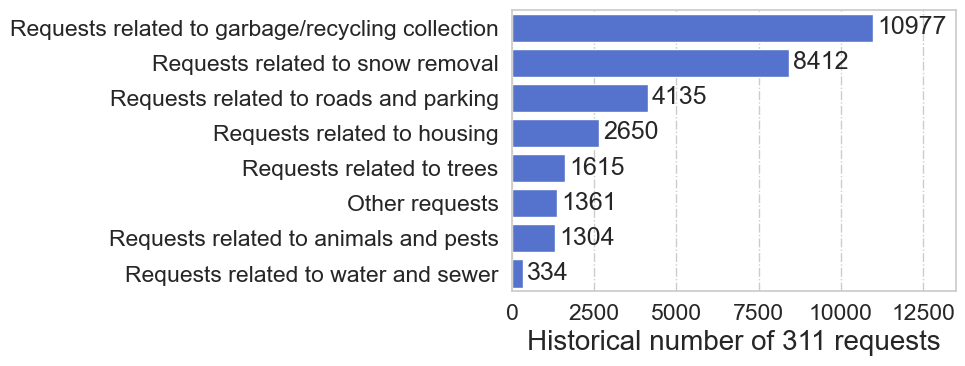

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,4))
sns.set_theme(style="whitegrid",font_scale = 1.5)

ax = sns.barplot(y="category_2", x="Case Reference", data=groupby_type2, color = "royalblue")
ax.bar_label(ax.containers[0], padding=3)
plt.xlabel('Historical number of 311 requests', fontsize=20)
plt.ylabel('')
plt.xlim(0,13500)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../Figures/Categories of historical 311 requests.png",dpi=300)